# importing the files from directory

In [1]:
import pandas as pd
import os
import numpy as np
import re
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from numpy import NaN

In [2]:
SSale = pd.read_csv('SSale.csv')
SSale.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [3]:
SSale.columns = [re.sub(r'([^A-z])',r'_',x).lower() for x in SSale.columns]

In [4]:
SSale.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address'],
      dtype='object')

In [5]:
SSale.shape

(186850, 6)

In [6]:
SSale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
order_id            186305 non-null object
product             186305 non-null object
quantity_ordered    186305 non-null object
price_each          186305 non-null object
order_date          186305 non-null object
purchase_address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


In [7]:
SSale['order_id'] = pd.to_numeric(SSale['order_id'], errors ='coerce')

In [8]:
SSale['price_each'] = pd.to_numeric(SSale['price_each'], errors ='coerce')

In [9]:
SSale['quantity_ordered'] = pd.to_numeric(SSale['quantity_ordered'], errors = 'coerce')

In [10]:

SSale['order_date'] = SSale['order_date'].replace({'Order Date':np.nan})

In [11]:
SSale['purchase_address'] = SSale['purchase_address'].replace({'Purchase Address':np.nan})

In [12]:
simp = SimpleImputer(missing_values = NaN,strategy = 'most_frequent')
simp.fit(SSale['order_date'].values.reshape(-1,1))
SSale['order_date'] = simp.transform(SSale['order_date'].values.reshape(-1,1))

In [13]:
SSale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
order_id            185950 non-null float64
product             186305 non-null object
quantity_ordered    185950 non-null float64
price_each          185950 non-null float64
order_date          186850 non-null object
purchase_address    185950 non-null object
dtypes: float64(3), object(3)
memory usage: 8.6+ MB


In [14]:
SSale.describe(include = object)

,product,order_date,purchase_address
count,186305,186850,185950
unique,20,142395,140787
top,USB-C Charging Cable,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016"
freq,21903,908,9


In [15]:
missing = SSale.isnull().sum()
missing

order_id            900
product             545
quantity_ordered    900
price_each          900
order_date            0
purchase_address    900
dtype: int64

### Handling missing data using MICE which is the most suitable method

In [16]:
simp = SimpleImputer(missing_values = NaN,strategy = 'median')
simp.fit(SSale['price_each'].values.reshape(-1,1))
SSale['price_each'] = simp.transform(SSale['price_each'].values.reshape(-1,1))

In [17]:
simp = SimpleImputer(missing_values = NaN,strategy = 'most_frequent')
simp.fit(SSale['purchase_address'].values.reshape(-1,1))
SSale['purchase_address'] = simp.transform(SSale['purchase_address'].values.reshape(-1,1))

In [18]:
imp = SimpleImputer(missing_values = NaN,strategy = 'median')
imp.fit(SSale['order_id'].values.reshape(-1,1))
SSale['order_id'] = imp.transform(SSale['order_id'].values.reshape(-1,1))

In [19]:
imp =IterativeImputer(max_iter = 100,random_state = 0)
imp.fit(SSale['quantity_ordered'].values.reshape(-1,1))
SSale['quantity_ordered'] = imp.transform(SSale['quantity_ordered'].values.reshape(-1,1))

In [20]:
simp = SimpleImputer(missing_values = NaN,strategy = 'most_frequent')
simp.fit(SSale['product'].values.reshape(-1,1))
SSale['product'] = simp.transform(SSale['product'].values.reshape(-1,1))

In [21]:
SSale.isnull().sum()

order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
dtype: int64

### data type conversions and creating new month

In [43]:
SSale['Month'] = pd.to_datetime(SSale['order_date']).dt.month

## creating new column for sales

In [23]:
SSale['Sales'] = SSale['quantity_ordered']*SSale['price_each']

### month with highest sales

In [52]:
rec = SSale.groupby('Month').sum()['Sales']


In [47]:
mon = [month for month,df in SSale.groupby('Month')]

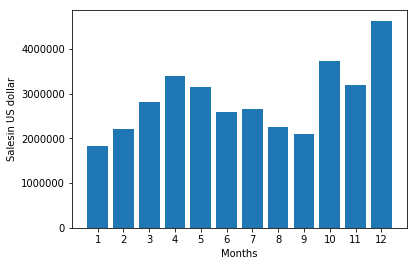

In [50]:
from matplotlib import pyplot as plt
import datetime
plt.bar(mon,rec)
plt.xticks(mon)
plt.xlabel('Months')
plt.ylabel('Salesin US dollar')
plt.show()

### creating city that recorded highest sales

In [27]:
def my_city(address):
    return address.split(',')[1]
def my_state(address):
    return address.split(',')[2]

In [28]:
SSale.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,Month,Sales
0,176558.0,USB-C Charging Cable,2.000000,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
1,230367.5,USB-C Charging Cable,1.124383,14.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016",12,16.809524
2,176559.0,Bose SoundSport Headphones,1.000000,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.990000
3,176560.0,Google Phone,1.000000,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560.0,Wired Headphones,1.000000,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000


In [29]:
SSale['city'] = SSale['purchase_address'].apply(lambda x: my_city(x)+","+my_state(x))


In [30]:
rec = SSale.groupby('city').sum()

## To grab all the cities for plotting we use [city for city,df in filename.groupby('city]

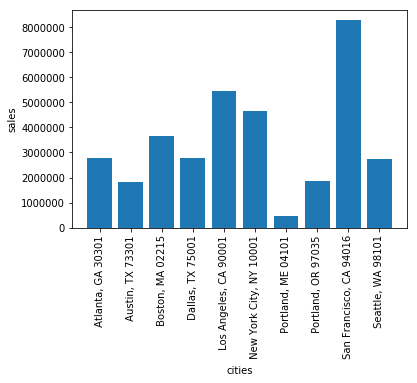

In [31]:
cities = [city for city, df in SSale.groupby('city')]
plt.bar(cities,rec['Sales'])
plt.xticks(cities, rotation = 'vertical',size = 10)
plt.xlabel('cities')
plt.ylabel('sales')
plt.show()

#### time to display adverts for posibilities of high sales

In [32]:
SSale['Hour'] = pd.to_datetime(SSale['order_date']).dt.hour

In [33]:
SSale['Minute'] = pd.to_datetime(SSale['order_date']).dt.minute


In [34]:
SSale.head(3)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,Month,Sales,city,Hour,Minute
0,176558.0,USB-C Charging Cable,2.000000,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,"Dallas, TX 75001",8,46
1,230367.5,USB-C Charging Cable,1.124383,14.95,12/15/19 20:16,"193 Forest St, San Francisco, CA 94016",12,16.809524,"San Francisco, CA 94016",20,16
2,176559.0,Bose SoundSport Headphones,1.000000,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.990000,"Boston, MA 02215",22,30


In [35]:
res = SSale.groupby('Hour').count()

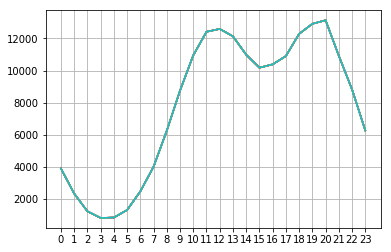

In [36]:
hours = [hour for hour, df in SSale.groupby('Hour')]
plt.plot(hours,res)
plt.xticks(hours)
plt.grid()
plt.show()

#### What product sold most

In [37]:
prices = SSale.groupby('product').sum()['price_each']

In [38]:
resd = SSale.groupby('product').sum()['quantity_ordered']

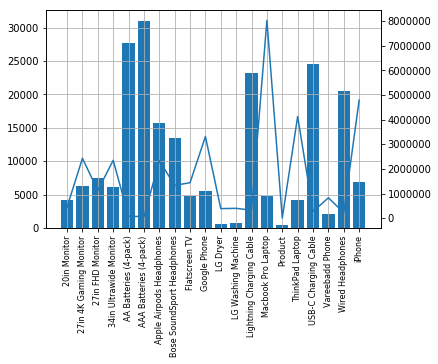

In [39]:
fig = plt.figure()
ax1 = fig.subplots()
ax2 = ax1.twinx()
products = [product for product,df in SSale.groupby('product')]
ax1.bar(products,resd)
ax2.plot(products,prices)
ax1.set_xticklabels(products, rotation = 'vertical', size = 8)
ax1.grid()
plt.show()
